# Coherence analysis notebook

Brief 1-2 sentence description of notebook.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Imports of all used packages and libraries
import os
import glob
from collections import defaultdict
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
from scipy.stats import mannwhitneyu

In [3]:
import spikeinterface.extractors as se
import spikeinterface.preprocessing as sp
from spectral_connectivity import Multitaper, Connectivity
import spectral_connectivity

In [4]:
font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

## Inputs & Data

Explanation of each input and where it comes from.

In [5]:
# Inputs and Required data loading
# input varaible names are in all caps snake case
# Whenever an input changes or is used for processing 
# the vairables are all lower in snake case
OUTPUT_DIR = r"./proc/" # where data is saved should always be shown in the inputs
os.makedirs(OUTPUT_DIR, exist_ok=True)

In [6]:
CHANNEL_MAPPING_DF = pd.read_excel("../../data/channel_mapping.xlsx")
TONE_TIMESTAMP_DF = pd.read_excel("../../data/rce_tone_timestamp.xlsx", index_col=0)

In [7]:
BASIC_LFP_TRACES_DF = pd.read_pickle("./proc/full_baseline_and_trial_lfp_traces.pkl")

In [8]:
BASIC_LFP_TRACES_DF = BASIC_LFP_TRACES_DF.drop_duplicates(["recording_file", "time", "current_subject"])

In [9]:
TIME_HALFBANDWIDTH_PRODUCT = 2
TIME_WINDOW_DURATION = 1
TIME_WINDOW_STEP = 0.5
RESAMPLE_RATE=1000


In [10]:
TRIAL_OR_BASELINE_TO_STYLE = {'baseline': "--", "trial": "-"}

In [11]:
OUTCOME_TO_COLOR = {'lose': "red",
 'omission': "orange",
 'rewarded': "green",
 'win': "blue"}

In [12]:
GROUPINGS = "trial_outcome"

In [13]:
LOW_FREQ = 0
HIGH_FREQ = 100

In [14]:
# BAND_TO_FREQ = {"theta": (4,13), "beta": (12,31), "gamma": (30, 91)}
BAND_TO_FREQ = {"theta": (6,11), "beta": (20,31), "gamma": (30,51)}

In [15]:
FONTSIZE=20

## Outputs

Describe each output that the notebook creates. 

- Is it a plot or is it data?

- How valuable is the output and why is it valuable or useful?

# Functions

In [16]:
def generate_pairs(lst):
    pairs = []
    n = len(lst)
    for i in range(n):
        for j in range(i+1, n):
            pairs.append((lst[i], lst[j]))
    return pairs

In [17]:
def nested_dict():
    return defaultdict(dict)

## Processing

Describe what is done to the data here and how inputs are manipulated to generate outputs. 

In [18]:
# As much code and as many cells as required
# includes EDA and playing with data
# GO HAM!

# Ideally functions are defined here first and then data is processed using the functions

# function names are short and in snake case all lowercase
# a function name should be unique but does not have to describe the function
# doc strings describe functions not function names




In [19]:
BASIC_LFP_TRACES_DF.head()

,time,recording_dir,recording_file,time_stamp_index,video_file,video_frame,video_number,subject_info,competition_closeness,video_name,...,mPFC_baseline_lfp_trace,mPFC_trial_lfp_trace,vHPC_baseline_lfp_trace,vHPC_trial_lfp_trace,BLA_baseline_lfp_trace,BLA_trial_lfp_trace,LH_baseline_lfp_trace,LH_trial_lfp_trace,MD_baseline_lfp_trace,MD_trial_lfp_trace
0,6310663,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,1390826,20221202_134600_omission_and_competition_subje...,1734,1.0,6_1_top_2_base_3,rewarded,20221202_134600_omission_and_competition_subje...,...,"[1.8457601, 1.7363818, 1.6475118, 1.59738, 1.2...","[0.6927297, 0.96389693, 0.7884358, -0.04101689...","[-0.06969439, -0.09568214, -0.05315674, 0.1571...","[1.5864334, 1.5710771, 1.5970649, 1.2155175, 0...","[2.0367627, 2.1163385, 2.1618104, 2.2679114, 2...","[0.3164087, 0.36377528, 0.18757163, -0.5020857...","[3.1382985, 3.2319791, 3.2788196, 3.2881875, 3...","[0.8118982, 1.2209699, 0.87435186, -0.4028264,...","[1.3934726, 1.494771, 1.764077, 1.828315, 1.68...","[-0.9783956, -0.86721426, -0.7288553, -1.40582..."
1,7910662,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,2990825,20221202_134600_omission_and_competition_subje...,3728,1.0,6_1_top_2_base_3,rewarded,20221202_134600_omission_and_competition_subje...,...,"[1.2191132, 1.1348007, 1.2054409, 1.0960625, 0...","[1.0732753, 0.7246318, 0.7633699, 0.3782669, -...","[0.31539667, 0.23152715, 0.29767776, 0.4217101...","[0.03543783, -0.27641505, -0.40044746, -0.6638...","[0.3107247, 0.14209972, -0.05873455, -0.331566...","[0.026525281, -0.04547191, 0.11936376, -0.4092...","[-1.180375, -1.2959143, -1.3771042, -1.458294,...","[0.9492963, 0.46840277, 0.6713773, 0.043717593...","[-0.14577106, -0.16059524, 0.027177656, 0.1680...","[1.6281886, 1.349, 1.4675934, 0.9487473, -0.21..."
2,9710660,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,4790823,20221202_134600_omission_and_competition_subje...,5972,1.0,6_1_top_2_base_3,rewarded,20221202_134600_omission_and_competition_subje...,...,"[-1.2669662, -1.2965895, -1.2532939, -0.986684...","[0.28711826, 0.84996116, 1.0960625, 0.8226166,...","[-1.2556804, -1.2580429, -1.3312811, -1.118654...","[0.060244307, 0.4748669, 0.7654571, 0.6591436,...","[-1.9912907, -1.9041362, -1.9325562, -1.542255...","[0.69344664, 1.4001559, 1.7582471, 1.4304705, ...","[-0.19985186, -0.074944444, -0.18423842, -0.13...","[-0.59643286, 0.27167362, 0.6901134, 0.4371759...","[-0.32119048, -0.52872896, -0.96851283, -0.753...","[0.096357144, 0.88450915, 1.2131118, 0.8943919..."
3,11310658,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,6390821,20221202_134600_omission_and_competition_subje...,7966,1.0,6_1_top_2_base_3,omission,20221202_134600_omission_and_competition_subje...,...,"[-2.0257788, -2.0348935, -1.9323514, -1.754611...","[2.376701, 2.3015034, 1.7796774, 0.9411098, 0....","[0.16655779, 0.42879772, 0.66268736, 0.6934002...","[-1.8427671, -2.303459, -2.6802812, -3.060647,...","[-1.2637402, -1.0382752, -0.82986236, -0.74649...","[2.6771586, 2.3929594, 2.209177, 1.9761335, 1....","[-2.538743, -2.1983705, -1.8673657, -1.7143542...","[2.8447661, 2.3045416, 1.5301157, 0.96490973, ...","[-2.7647088, -2.5546997, -2.3051593, -2.055619...","[2.087738, 1.7418406, 1.1266373, 0.45954946, 0..."
4,12810657,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,7890820,20221202_134600_omission_and_competition_subje...,9836,1.0,6_1_top_2_base_3,rewarded,20221202_134600_omission_and_competition_subje...,...,"[-0.5765152, 0.25749493, 0.6403192, 0.4375135,...","[-0.043295607, 0.73602533, 0.31674156, 0.07747...","[-0.31421542, 0.19727057, 0.4453354, 0.3744597...","[0.21617076, 0.8221576, 0.58236164, 0.43116024...","[-2.1352851, -2.0576038, -2.0822346, -2.140969...","[-0.18188764, 0.113

In [20]:
BASIC_LFP_TRACES_DF = BASIC_LFP_TRACES_DF.reset_index()

## Getting the brain region pairs

In [21]:
trace_columns = [col for col in BASIC_LFP_TRACES_DF.columns if "trace" in col]

In [22]:
trace_columns

['mPFC_baseline_lfp_trace',
 'mPFC_trial_lfp_trace',
 'vHPC_baseline_lfp_trace',
 'vHPC_trial_lfp_trace',
 'BLA_baseline_lfp_trace',
 'BLA_trial_lfp_trace',
 'LH_baseline_lfp_trace',
 'LH_trial_lfp_trace',
 'MD_baseline_lfp_trace',
 'MD_trial_lfp_trace']

In [23]:
trial_trace_columns = sorted([col for col in BASIC_LFP_TRACES_DF.columns if "trial_lfp_trace" in col])
baseline_trace_columns = sorted([col for col in BASIC_LFP_TRACES_DF.columns if "baseline_lfp_trace" in col])

In [24]:
trial_trace_columns

['BLA_trial_lfp_trace',
 'LH_trial_lfp_trace',
 'MD_trial_lfp_trace',
 'mPFC_trial_lfp_trace',
 'vHPC_trial_lfp_trace']

- Getting the trace column pairs

In [25]:
trial_brain_region_pairs = generate_pairs(trial_trace_columns)
trial_brain_region_pairs = sorted(trial_brain_region_pairs)
baseline_brain_region_pairs = generate_pairs(baseline_trace_columns)
baseline_brain_region_pairs = sorted(baseline_brain_region_pairs)

In [26]:
trial_brain_region_pairs

[('BLA_trial_lfp_trace', 'LH_trial_lfp_trace'),
 ('BLA_trial_lfp_trace', 'MD_trial_lfp_trace'),
 ('BLA_trial_lfp_trace', 'mPFC_trial_lfp_trace'),
 ('BLA_trial_lfp_trace', 'vHPC_trial_lfp_trace'),
 ('LH_trial_lfp_trace', 'MD_trial_lfp_trace'),
 ('LH_trial_lfp_trace', 'mPFC_trial_lfp_trace'),
 ('LH_trial_lfp_trace', 'vHPC_trial_lfp_trace'),
 ('MD_trial_lfp_trace', 'mPFC_trial_lfp_trace'),
 ('MD_trial_lfp_trace', 'vHPC_trial_lfp_trace'),
 ('mPFC_trial_lfp_trace', 'vHPC_trial_lfp_trace')]

In [27]:
baseline_brain_region_pairs

[('BLA_baseline_lfp_trace', 'LH_baseline_lfp_trace'),
 ('BLA_baseline_lfp_trace', 'MD_baseline_lfp_trace'),
 ('BLA_baseline_lfp_trace', 'mPFC_baseline_lfp_trace'),
 ('BLA_baseline_lfp_trace', 'vHPC_baseline_lfp_trace'),
 ('LH_baseline_lfp_trace', 'MD_baseline_lfp_trace'),
 ('LH_baseline_lfp_trace', 'mPFC_baseline_lfp_trace'),
 ('LH_baseline_lfp_trace', 'vHPC_baseline_lfp_trace'),
 ('MD_baseline_lfp_trace', 'mPFC_baseline_lfp_trace'),
 ('MD_baseline_lfp_trace', 'vHPC_baseline_lfp_trace'),
 ('mPFC_baseline_lfp_trace', 'vHPC_baseline_lfp_trace')]

- Getting just the region names

In [28]:
all_pair_base_name = []
for region_1, region_2 in trial_brain_region_pairs:
    all_pair_base_name.append("{}_{}".format(region_1.split("_")[0], region_2.split("_")[0]))
all_pair_base_name = sorted(all_pair_base_name)

In [29]:
all_pair_base_name

['BLA_LH',
 'BLA_MD',
 'BLA_mPFC',
 'BLA_vHPC',
 'LH_MD',
 'LH_mPFC',
 'LH_vHPC',
 'MD_mPFC',
 'MD_vHPC',
 'mPFC_vHPC']

## Coherece Calculation

- Calculating the coherence

In [30]:
BASIC_LFP_TRACES_DF.head()

,index,time,recording_dir,recording_file,time_stamp_index,video_file,video_frame,video_number,subject_info,competition_closeness,...,mPFC_baseline_lfp_trace,mPFC_trial_lfp_trace,vHPC_baseline_lfp_trace,vHPC_trial_lfp_trace,BLA_baseline_lfp_trace,BLA_trial_lfp_trace,LH_baseline_lfp_trace,LH_trial_lfp_trace,MD_baseline_lfp_trace,MD_trial_lfp_trace
0,0,6310663,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,1390826,20221202_134600_omission_and_competition_subje...,1734,1.0,6_1_top_2_base_3,rewarded,...,"[1.8457601, 1.7363818, 1.6475118, 1.59738, 1.2...","[0.6927297, 0.96389693, 0.7884358, -0.04101689...","[-0.06969439, -0.09568214, -0.05315674, 0.1571...","[1.5864334, 1.5710771, 1.5970649, 1.2155175, 0...","[2.0367627, 2.1163385, 2.1618104, 2.2679114, 2...","[0.3164087, 0.36377528, 0.18757163, -0.5020857...","[3.1382985, 3.2319791, 3.2788196, 3.2881875, 3...","[0.8118982, 1.2209699, 0.87435186, -0.4028264,...","[1.3934726, 1.494771, 1.764077, 1.828315, 1.68...","[-0.9783956, -0.86721426, -0.7288553, -1.40582..."
1,1,7910662,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,2990825,20221202_134600_omission_and_competition_subje...,3728,1.0,6_1_top_2_base_3,rewarded,...,"[1.2191132, 1.1348007, 1.2054409, 1.0960625, 0...","[1.0732753, 0.7246318, 0.7633699, 0.3782669, -...","[0.31539667, 0.23152715, 0.29767776, 0.4217101...","[0.03543783, -0.27641505, -0.40044746, -0.6638...","[0.3107247, 0.14209972, -0.05873455, -0.331566...","[0.026525281, -0.04547191, 0.11936376, -0.4092...","[-1.180375, -1.2959143, -1.3771042, -1.458294,...","[0.9492963, 0.46840277, 0.6713773, 0.043717593...","[-0.14577106, -0.16059524, 0.027177656, 0.1680...","[1.6281886, 1.349, 1.4675934, 0.9487473, -0.21..."
2,2,9710660,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,4790823,20221202_134600_omission_and_competition_subje...,5972,1.0,6_1_top_2_base_3,rewarded,...,"[-1.2669662, -1.2965895, -1.2532939, -0.986684...","[0.28711826, 0.84996116, 1.0960625, 0.8226166,...","[-1.2556804, -1.2580429, -1.3312811, -1.118654...","[0.060244307, 0.4748669, 0.7654571, 0.6591436,...","[-1.9912907, -1.9041362, -1.9325562, -1.542255...","[0.69344664, 1.4001559, 1.7582471, 1.4304705, ...","[-0.19985186, -0.074944444, -0.18423842, -0.13...","[-0.59643286, 0.27167362, 0.6901134, 0.4371759...","[-0.32119048, -0.52872896, -0.96851283, -0.753...","[0.096357144, 0.88450915, 1.2131118, 0.8943919..."
3,3,11310658,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,6390821,20221202_134600_omission_and_competition_subje...,7966,1.0,6_1_top_2_base_3,omission,...,"[-2.0257788, -2.0348935, -1.9323514, -1.754611...","[2.376701, 2.3015034, 1.7796774, 0.9411098, 0....","[0.16655779, 0.42879772, 0.66268736, 0.6934002...","[-1.8427671, -2.303459, -2.6802812, -3.060647,...","[-1.2637402, -1.0382752, -0.82986236, -0.74649...","[2.6771586, 2.3929594, 2.209177, 1.9761335, 1....","[-2.538743, -2.1983705, -1.8673657, -1.7143542...","[2.8447661, 2.3045416, 1.5301157, 0.96490973, ...","[-2.7647088, -2.5546997, -2.3051593, -2.055619...","[2.087738, 1.7418406, 1.1266373, 0.45954946, 0..."
4,4,12810657,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,7890820,20221202_134600_omission_and_competition_subje...,9836,1.0,6_1_top_2_base_3,rewarded,...,"[-0.5765152, 0.25749493, 0.6403192, 0.4375135,...","[-0.043295607, 0.73602533, 0.31674156, 0.07747...","[-0.31421542, 0.19727057, 0.4453354, 0.3744597...","[0.21617076, 0.8221576, 0.58236164, 0.43116024...","[-2.1352851, -2.0576038, -2.0822346, -2.140969...","[-0.18188764, 0.113679774, -0.66123736, -0.935...","[-2.1671436, -1.4832754, -1.0554676, -1.130412...","[0.5339792, 1.5113796, 0.57145137, -0.02810416...","[-2.0111465, -1.714663, -1.4255916, -1.3662949...","[0.31871977, 1.008044, 0.25942308, -0.22730403..."


In [31]:
for region_1, region_2 in trial_brain_region_pairs:
    pair_base_name = "{}_{}".format(region_1.split("_")[0], region_2.split("_")[0])
    print(pair_base_name)
    try:
        multitaper_col = "{}_trial_multitaper".format(pair_base_name)
        BASIC_LFP_TRACES_DF[multitaper_col] = BASIC_LFP_TRACES_DF.apply(lambda x: Multitaper(time_series=np.array([x[region_1],x[region_2]]).T, sampling_frequency=RESAMPLE_RATE, time_halfbandwidth_product=TIME_HALFBANDWIDTH_PRODUCT, time_window_step=TIME_WINDOW_STEP, time_window_duration=TIME_WINDOW_DURATION), axis=1)
    
        connectivity_col = "{}_trial_connectivity".format(pair_base_name)
        BASIC_LFP_TRACES_DF[connectivity_col] = BASIC_LFP_TRACES_DF[multitaper_col].apply(lambda x: Connectivity.from_multitaper(x))
        
        BASIC_LFP_TRACES_DF["{}_trial_frequencies".format(pair_base_name)] = BASIC_LFP_TRACES_DF[connectivity_col].apply(lambda x: x.frequencies)
    
        BASIC_LFP_TRACES_DF["{}_trial_all_window_coherence".format(pair_base_name)] = BASIC_LFP_TRACES_DF[connectivity_col].apply(lambda x: x.coherence_magnitude()[:,:,0,1])

        BASIC_LFP_TRACES_DF["{}_trial_window_mean_coherence".format(pair_base_name)] = BASIC_LFP_TRACES_DF["{}_trial_all_window_coherence".format(pair_base_name)].apply(lambda x: np.nanmean(x, axis=0))
    except Exception as e: 
        print(e)
    

BLA_LH
BLA_MD
BLA_mPFC
BLA_vHPC
LH_MD
LH_mPFC
LH_vHPC
MD_mPFC
MD_vHPC
mPFC_vHPC


In [57]:
BASIC_LFP_TRACES_DF

,index,time,recording_dir,recording_file,time_stamp_index,video_file,video_frame,video_number,subject_info,competition_closeness,...,BLA_LH_averaged_gamma_coherence,BLA_MD_averaged_gamma_coherence,BLA_mPFC_averaged_gamma_coherence,BLA_vHPC_averaged_gamma_coherence,LH_MD_averaged_gamma_coherence,LH_mPFC_averaged_gamma_coherence,LH_vHPC_averaged_gamma_coherence,MD_mPFC_averaged_gamma_coherence,MD_vHPC_averaged_gamma_coherence,mPFC_vHPC_averaged_gamma_coherence
0,0,6310663,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,1390826,20221202_134600_omission_and_competition_subje...,1734,1.0,6_1_top_2_base_3,rewarded,...,0.499640,0.470836,0.351823,0.357685,0.635814,0.410626,0.338340,0.404054,0.337728,0.351123
1,1,7910662,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,2990825,20221202_134600_omission_and_competition_subje...,3728,1.0,6_1_top_2_base_3,rewarded,...,0.508942,0.476508,0.407008,0.379248,0.679223,0.470824,0.371506,0.428294,0.360124,0.346129
2,2,9710660,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,4790823,20221202_134600_omission_and_competition_subje...,5972,1.0,6_1_top_2_base_3,rewarded,...,0.508326,0.501010,0.398689,0.357946,0.683453,0.474007,0.364185,0.443627,0.363732,0.352495
3,3,11310658,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,6390821,20221202_134600_omission_and_competition_subje...,7966,1.0,6_1_top_2_base_3,omission,...,0.534624,0.511115,0.417834,0.357903,0.723775,0.502959,0.369364,0.459465,0.383078,0.348057
4,4,12810657,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,7890820,20221202_134600_omission_and_competition_subje...,9836,1.0,6_1_top_2_base_3,rewarded,...,0.552537,0.520906,0.395221,0.361975,0.719064,0.477202,0.366584,0.456442,0.361871,0.356863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,538,65281838,20230621_111240_standard_comp_to_omission_D5_s...,20230621_111240_standard_comp_to_omission_D5_s...,62088794,20230621_111240_standard_comp_to_omission_D5_s...,62056,1.0,1-4_t3b3L_box1,rewarded,...,0.462755,0.467159,0.350367,0.661165,0.893937,0.448466,0.494064,0.445330,0.509131,0.359443
387,539,66781856,20230621_111240_standard_comp_to_omission_D5_s...,20230621_111240_standard_comp_to_omission_D5_s...,63588812,20230621_111240_standard_comp_to_omission_D5_s...,63554,1.0,1-4_t3b3L_box1,rewarded,...,0.485384,0.492270,0.356262,0.664325,0.892125,0.435742,0.502961,0.435023,0.522743,0.386973
388,540,68781880,20230621_111240_standard_comp_to_omission_D5_s...,20230621_111240_standard_comp_to_omission_D5_s...,65588836,20230621_111240_standard_comp_to_omission_D5_s...,65550,1.0,1-4_t3b3L_box1,rewarded,...,0.475034,0.474519,0.370234,0.697874,0.910679,0.449911,0.529935,0.448910,0.522974,0.378955
389,541,70681909,20230621_111240_standard_comp_to_omission_D5_s...,20230621_111240_standard_comp_to_omission_D5_s...,67488865,20230621_111240_standard_comp_to_omission_D5_s...,67447,1.0,1-4_t3b3L_box1,omission,...,0.482743,0.476346,0.357768,0.707187,0.904250,0.455020,0.525737,0.458055,0.520484,0.355079


In [32]:
BASIC_LFP_TRACES_DF["BLA_LH_trial_frequencies"]

0      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...
1      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...
2      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...
3      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...
4      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...
                             ...                        
386    [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...
387    [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...
388    [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...
389    [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...
390    [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...
Name: BLA_LH_trial_frequencies, Length: 391, dtype: object

In [33]:
BASIC_LFP_TRACES_DF["BLA_LH_trial_all_window_coherence"].iloc[0].shape

(19, 500)

In [34]:
all_frequencies = BASIC_LFP_TRACES_DF[[col for col in BASIC_LFP_TRACES_DF.columns if "frequencies" in col][0]].iloc[0]

In [35]:
all_frequencies

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

BLA_LH


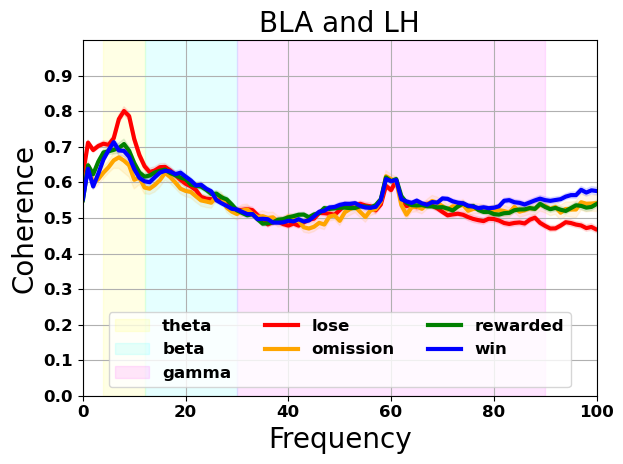

BLA_MD


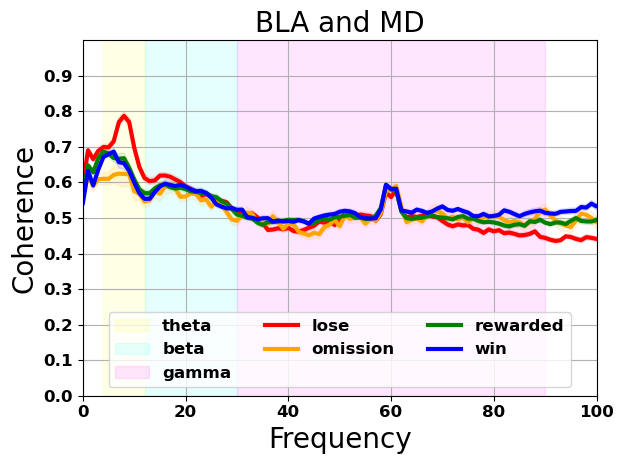

BLA_mPFC


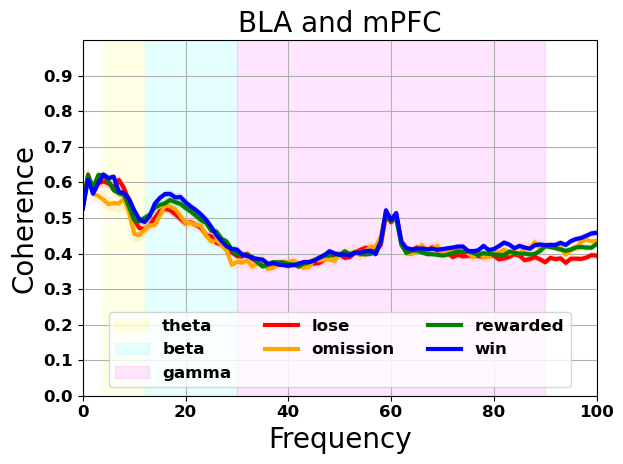

BLA_vHPC


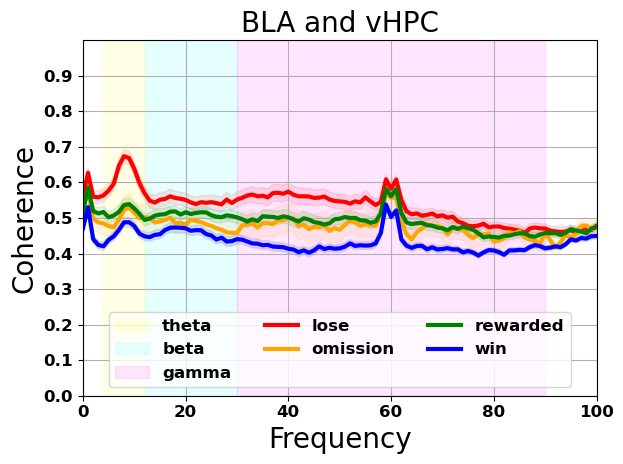

LH_MD


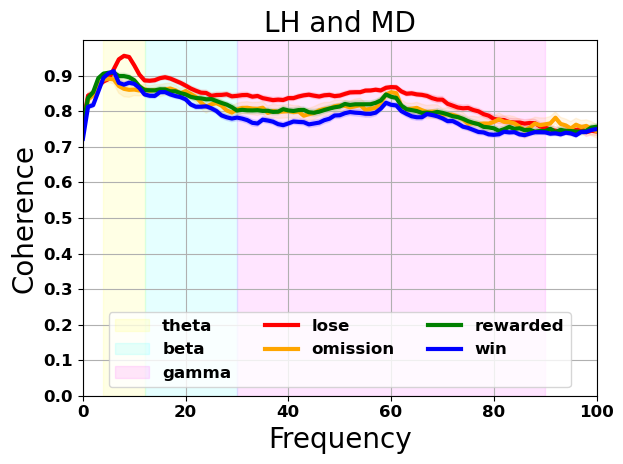

LH_mPFC


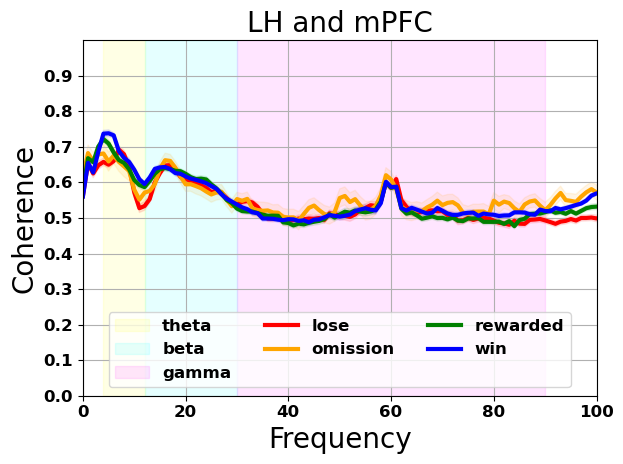

LH_vHPC


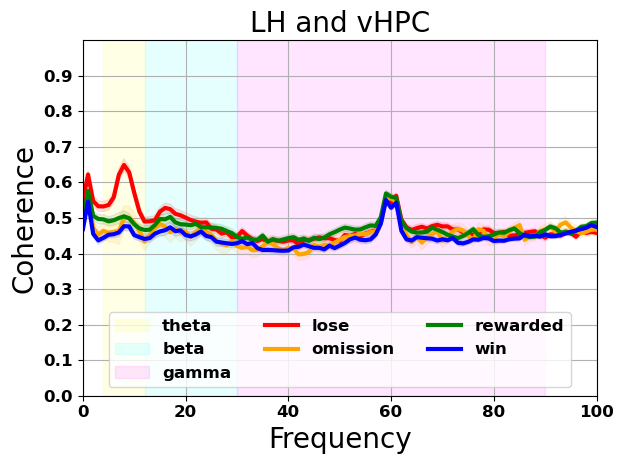

MD_mPFC


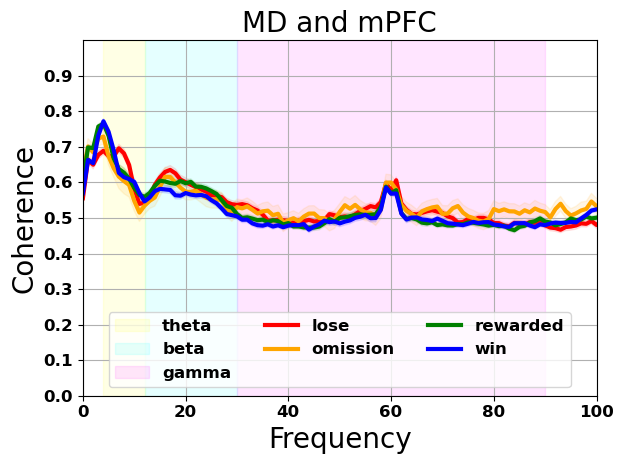

MD_vHPC


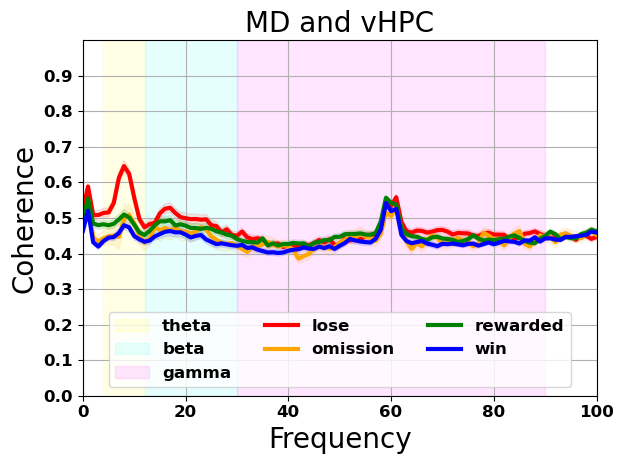

mPFC_vHPC


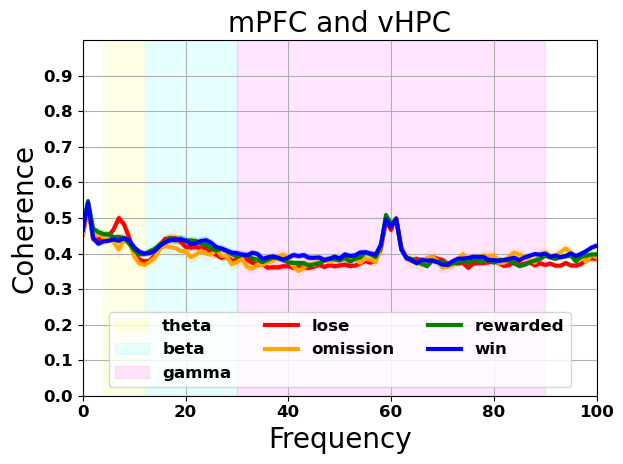

In [37]:
LOW_FREQ = 0
HIGH_FREQ = 100
for pair_base_name in all_pair_base_name:
    print(pair_base_name)
    # Setting up the plot
    fig, ax = plt.subplots()
    plt.title("{}".format(" and ".join(pair_base_name.split("_"))), fontsize=20)
    plt.xlabel("Frequency", fontsize=20)
    plt.ylabel("Coherence", fontsize=20)
    plt.xlim(LOW_FREQ, HIGH_FREQ)
    plt.yticks(np.arange(0, 1, 0.1))
    plt.ylim(0,1)
    
    # Plotting the frequency bands
    ax.axvspan(4, 12, alpha=0.1, color='yellow', label="theta")
    ax.axvspan(12, 30, alpha=0.1, color='cyan', label="beta")
    ax.axvspan(30, 90, alpha=0.1, color='magenta', label="gamma")
    plt.grid()

    # Calculating the mean and SEM
    coherence_col = "{}_trial_window_mean_coherence".format(pair_base_name)
    grouped_all_trials_df = BASIC_LFP_TRACES_DF.groupby([GROUPINGS]).agg({coherence_col: lambda x: np.vstack(x.tolist())}).reset_index()
    grouped_all_trials_df["mean_coherence"] = grouped_all_trials_df[coherence_col].apply(lambda x: np.nanmean(np.vstack(x), axis=0))
    grouped_all_trials_df["std_coherence"] = grouped_all_trials_df[coherence_col].apply(lambda x: np.nanstd(np.vstack(x), axis=0))
    grouped_all_trials_df["n_trials"] = grouped_all_trials_df[coherence_col].apply(lambda x: np.sum(~np.isnan(x), axis=0))
    grouped_all_trials_df["sem_coherence"] = grouped_all_trials_df.apply(lambda x: x["std_coherence"] / np.sqrt(x["n_trials"]), axis=1)

    # Plotting the line graph    
    for index, row in grouped_all_trials_df.iterrows():
        try:
            ax = sns.lineplot(x=all_frequencies, y=row["mean_coherence"], \
            label="{}".format(row[GROUPINGS]), color=OUTCOME_TO_COLOR[row[GROUPINGS]],
            linewidth=3)           

            plt.fill_between(all_frequencies, \
            row["mean_coherence"] - row["sem_coherence"], row["mean_coherence"] + row["sem_coherence"], alpha=0.1,
            color=OUTCOME_TO_COLOR[row[GROUPINGS]])

        except Exception as e: 
            print(e)

    # Finalizing the plot
    plt.legend(ncol=3, loc="lower center")
    plt.tight_layout()
    plt.savefig("./proc/coherence/{}_{}hz_{}_coherence_of_zscored_lfp.png".format(LOW_FREQ, HIGH_FREQ, pair_base_name))
    plt.show()
    
    
    

    

# Getting the average per frequency band for each trial outcome

In [38]:
all_coherence_col = [col for col in BASIC_LFP_TRACES_DF.columns if "trial_window_mean_coherence" in col]


In [39]:
all_coherence_col

['BLA_LH_trial_window_mean_coherence',
 'BLA_MD_trial_window_mean_coherence',
 'BLA_mPFC_trial_window_mean_coherence',
 'BLA_vHPC_trial_window_mean_coherence',
 'LH_MD_trial_window_mean_coherence',
 'LH_mPFC_trial_window_mean_coherence',
 'LH_vHPC_trial_window_mean_coherence',
 'MD_mPFC_trial_window_mean_coherence',
 'MD_vHPC_trial_window_mean_coherence',
 'mPFC_vHPC_trial_window_mean_coherence']

- Getting the average coherence for all frequencies in a given band for a single trial

In [41]:
BAND_TO_ALL_COL = defaultdict(list)
for band, frequency in BAND_TO_FREQ.items():
    for col in all_coherence_col:
        BAND_COL = "{}_averaged_{}_coherence".format("_".join(col.split("_")[:2]), band)
        BAND_TO_ALL_COL[band].append(BAND_COL)
        print(BAND_COL)
        print(frequency[0], frequency[1])
        BASIC_LFP_TRACES_DF[BAND_COL] = BASIC_LFP_TRACES_DF[col].apply(lambda x: np.nanmean(x[frequency[0]:frequency[1]]))    
        # BASIC_LFP_TRACES_DF[BAND_COL] = BASIC_LFP_TRACES_DF[col].apply(lambda x: x[frequency[0]:frequency[1]])    


BLA_LH_averaged_theta_coherence
4 13
BLA_MD_averaged_theta_coherence
4 13
BLA_mPFC_averaged_theta_coherence
4 13
BLA_vHPC_averaged_theta_coherence
4 13
LH_MD_averaged_theta_coherence
4 13
LH_mPFC_averaged_theta_coherence
4 13
LH_vHPC_averaged_theta_coherence
4 13
MD_mPFC_averaged_theta_coherence
4 13
MD_vHPC_averaged_theta_coherence
4 13
mPFC_vHPC_averaged_theta_coherence
4 13
BLA_LH_averaged_beta_coherence
12 31
BLA_MD_averaged_beta_coherence
12 31
BLA_mPFC_averaged_beta_coherence
12 31
BLA_vHPC_averaged_beta_coherence
12 31
LH_MD_averaged_beta_coherence
12 31
LH_mPFC_averaged_beta_coherence
12 31
LH_vHPC_averaged_beta_coherence
12 31
MD_mPFC_averaged_beta_coherence
12 31
MD_vHPC_averaged_beta_coherence
12 31
mPFC_vHPC_averaged_beta_coherence
12 31
BLA_LH_averaged_gamma_coherence
30 91
BLA_MD_averaged_gamma_coherence
30 91
BLA_mPFC_averaged_gamma_coherence
30 91
BLA_vHPC_averaged_gamma_coherence
30 91
LH_MD_averaged_gamma_coherence
30 91
LH_mPFC_averaged_gamma_coherence
30 91
LH_vHPC_

In [42]:
region_pair_to_outcome_to_coherence = {k: defaultdict(nested_dict) for k,v in BAND_TO_FREQ.items()}

for band, frequency in BAND_TO_FREQ.items():
    for outcome in BASIC_LFP_TRACES_DF[GROUPINGS].unique():
        outcome_df = BASIC_LFP_TRACES_DF[BASIC_LFP_TRACES_DF[GROUPINGS] == outcome].copy()
        for band_col in set(BAND_TO_ALL_COL[band]):
            pair_col = "_".join(band_col.split("_")[:-3])
            region_pair_to_outcome_to_coherence[band][pair_col][outcome]["mean"] = outcome_df[band_col].mean()
            region_pair_to_outcome_to_coherence[band][pair_col][outcome]["std"] = outcome_df[band_col].std() 
            region_pair_to_outcome_to_coherence[band][pair_col][outcome]["n_trials"] = len(outcome_df[band_col])
            region_pair_to_outcome_to_coherence[band][pair_col][outcome]["sem"] = outcome_df[band_col].std() / np.sqrt(len(outcome_df[band_col]))




In [64]:
exported_df = BASIC_LFP_TRACES_DF.copy()
exported_df = exported_df.drop(columns=[col for col in exported_df if "multitaper" in col], errors="ignore")
exported_df = exported_df.drop(columns=[col for col in exported_df if "thorax_velocity" in col], errors="ignore")
exported_df = exported_df.drop(columns=[col for col in exported_df if "chunked_power" in col], errors="ignore")
exported_df = exported_df.drop(columns=[col for col in exported_df if "connectivity" in col], errors="ignore")
exported_df = exported_df.drop(columns=[col for col in exported_df if "spike_interface" in col], errors="ignore")
exported_df = exported_df.drop(columns=[col for col in exported_df if "index" in col], errors="ignore")
exported_df = exported_df.drop(columns=[col for col in exported_df if "stamp" in col], errors="ignore")
exported_df = exported_df.drop(columns=[col for col in exported_df if "box" in col], errors="ignore")
exported_df = exported_df.drop(columns=[col for col in exported_df if "height" in col], errors="ignore")
exported_df = exported_df.drop(columns=[col for col in exported_df if "width" in col], errors="ignore")
exported_df = exported_df.drop(columns=[col for col in exported_df if "ratio" in col], errors="ignore")
exported_df = exported_df.drop(columns=[col for col in exported_df if "width" in col], errors="ignore")
exported_df = exported_df.drop(columns=['individual_subj',
 'all_subj',
 'recording_name',
 'track_names',
 'subject_id',
 'corner_path',
 'corner_parts',
 'rescaled_locations',
 'reward_port'], errors="ignore")

In [65]:
exported_df.to_pickle("./proc/per_trial_coherence.pkl")

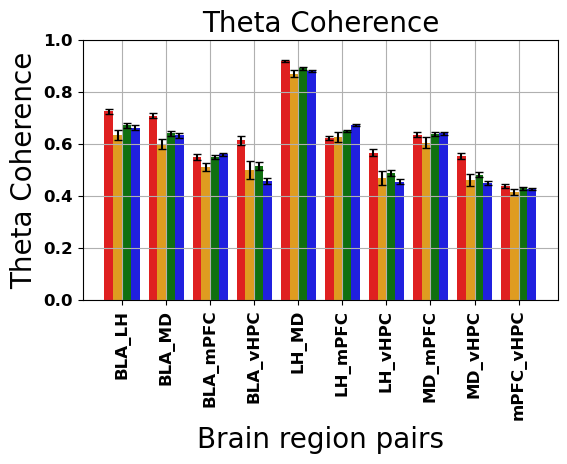

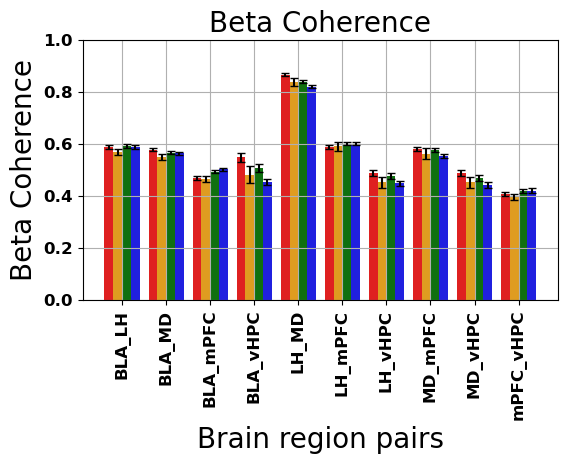

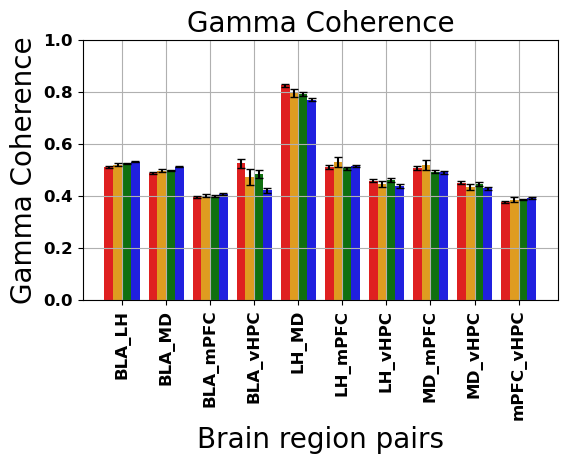

In [43]:
for band, frequency in BAND_TO_FREQ.items(): 
    # Convert the nested dictionary to a DataFrame
    data = []
    for group_name, group_data in region_pair_to_outcome_to_coherence[band].items():
        for bar_name, bar_dict in group_data.items():
            data.append({"Group": group_name, "Bar": bar_name, "coherence": bar_dict["mean"], "sem": bar_dict["sem"]})
    df = pd.DataFrame(data).sort_values(by=["Group", "Bar"])
    df["color"] = df["Bar"].map(OUTCOME_TO_COLOR)    
    # Create barplot
    ax = sns.barplot(x='Group', y='coherence', hue='Bar', data=df, palette=df["color"], ci=None)
    
    # Adding error bars
    groups = df['Group'].unique()
    bars_per_group = df['Bar'].nunique()
    bar_width = 0.8 / bars_per_group  # the width of the bars
    x_positions = []  # this will store the x positions for the error bars

    for i, group in enumerate(groups):
        group_data = df[df['Group'] == group]  # filter the dataframe for the specific group
        num_bars = group_data.shape[0]  # get the number of bars for this group
        group_positions = np.linspace(i - bar_width*(num_bars-1)/2, i + bar_width*(num_bars-1)/2, num_bars)
        x_positions.extend(group_positions)  # add these positions to the list

        for pos, (idx, row) in zip(group_positions, group_data.iterrows()):
            height = row['coherence']
            error = row['sem']
            plt.errorbar(pos, height, yerr=error, color='black', capsize=3, fmt='none', zorder=10)
    
    plt.xticks(rotation=90)
    plt.xlabel("Brain region pairs", fontsize=20)
    plt.ylabel("{} Coherence".format(band.title()), fontsize=20)
    plt.legend(title="Trial Conditions", loc="lower left", ncol=4)
    plt.title("{} Coherence".format(band.title()), fontsize=20)
    plt.tight_layout()
    plt.grid()
    plt.ylim(0,1)
    ax.get_legend().remove()

    plt.savefig("./proc/coherence/all_zscored_{}_lfp_power_coherence.png".format(band))
    # Show the plot
    plt.show()

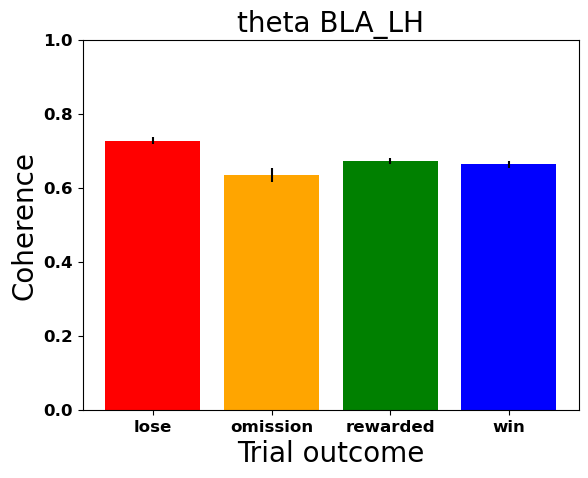

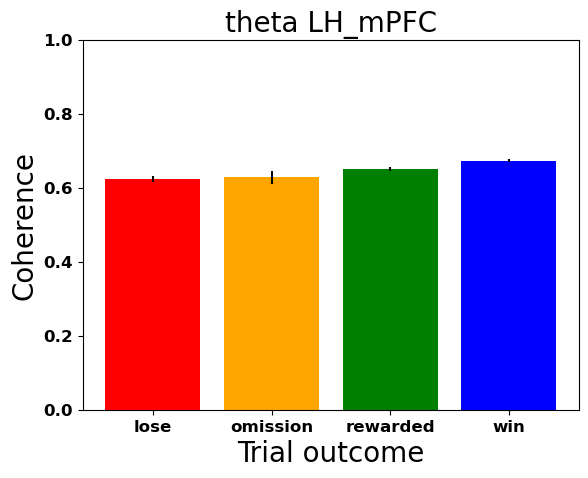

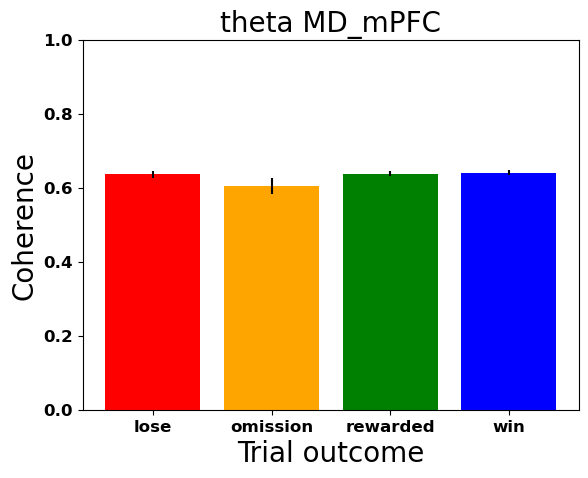

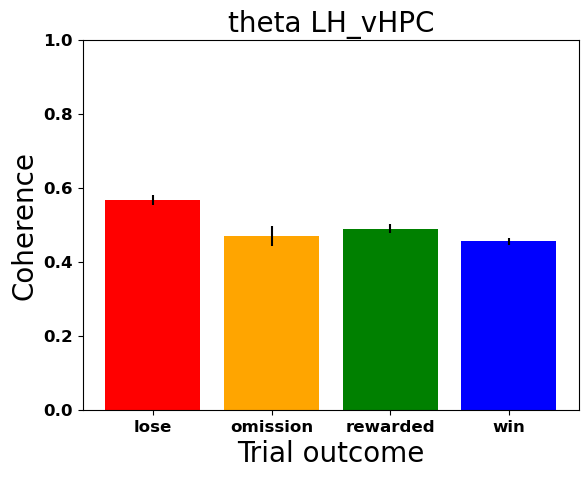

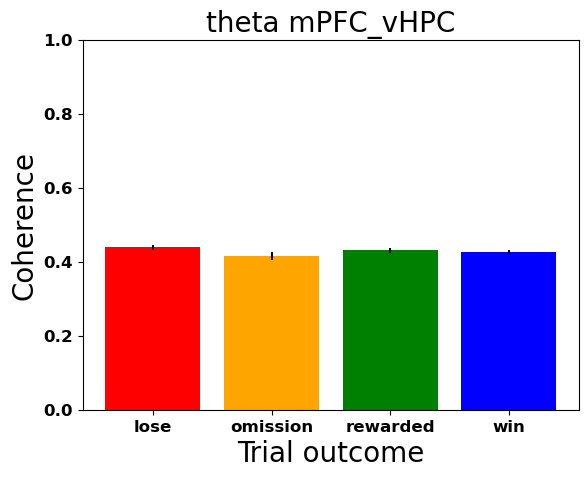

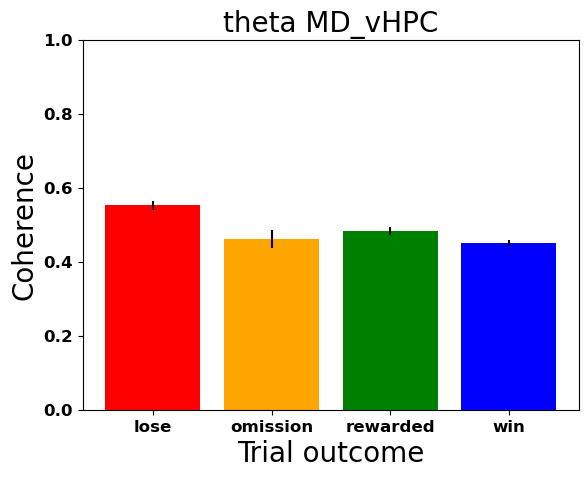

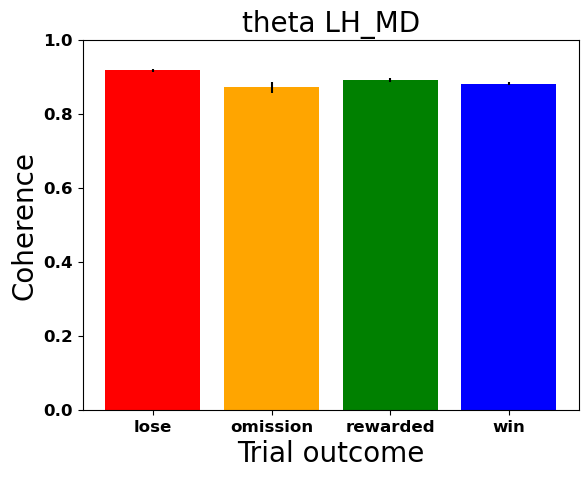

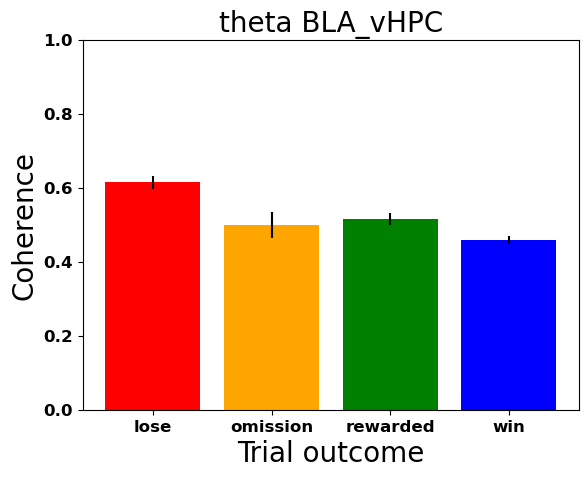

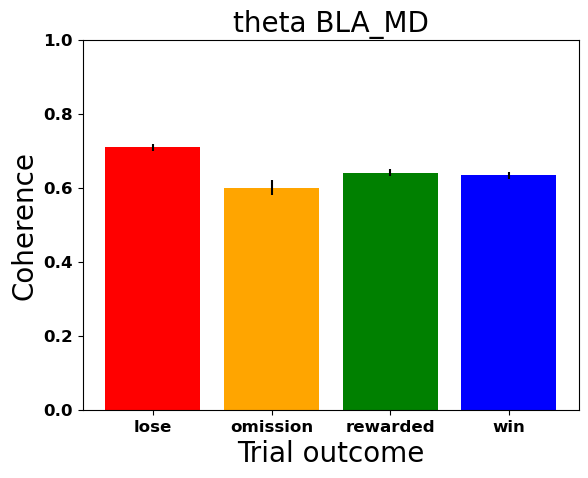

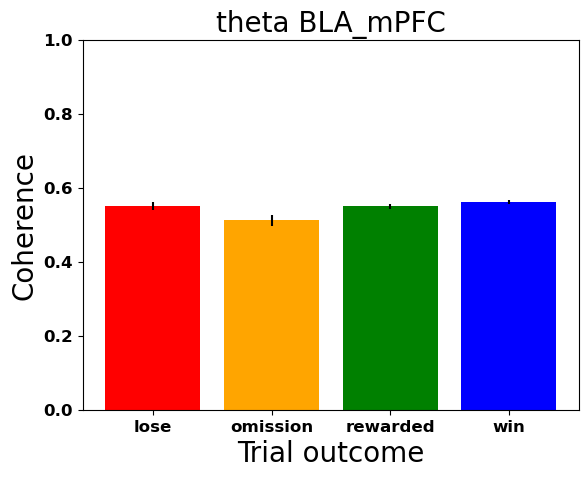

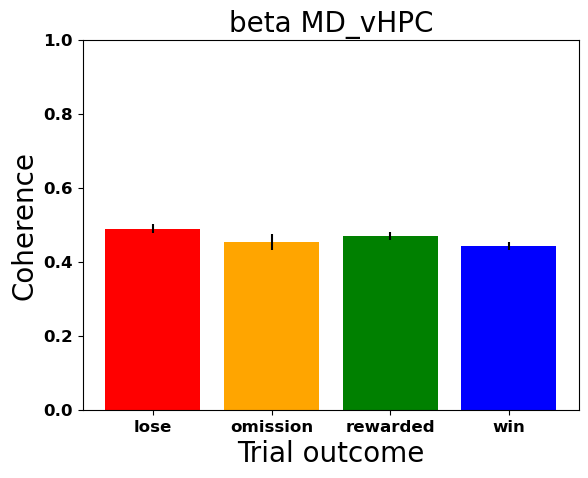

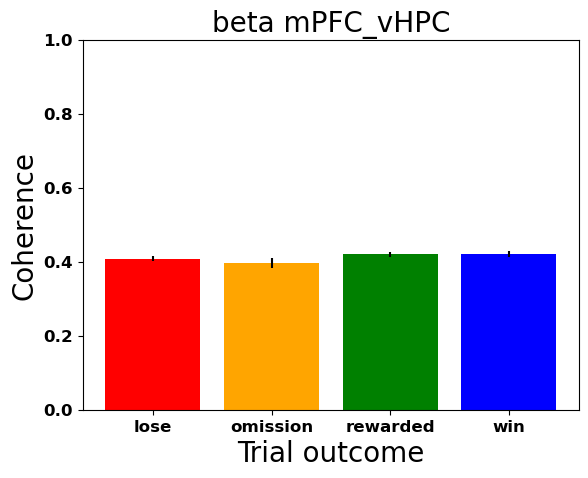

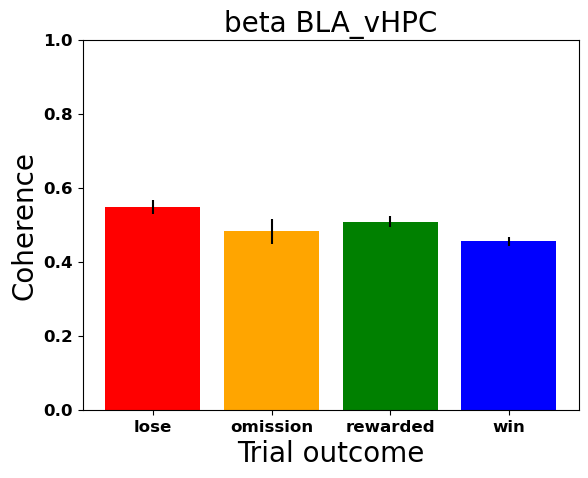

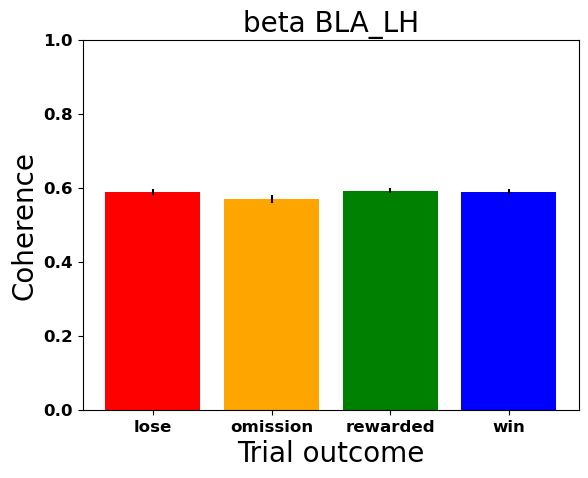

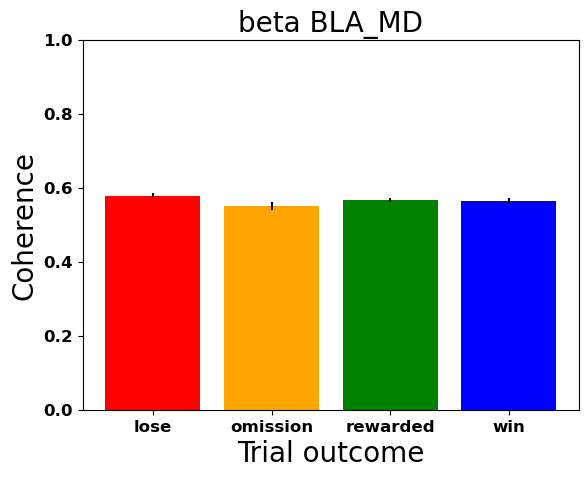

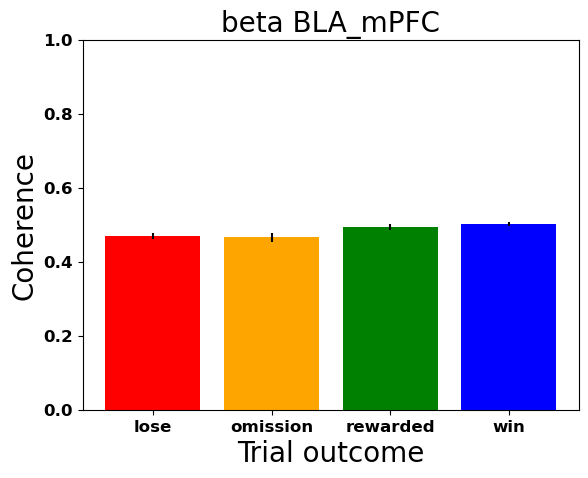

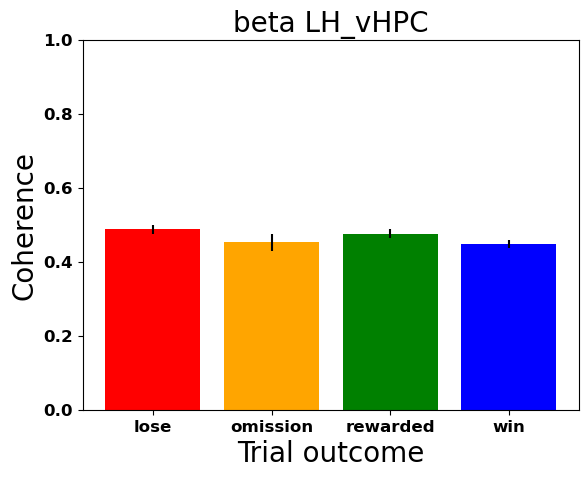

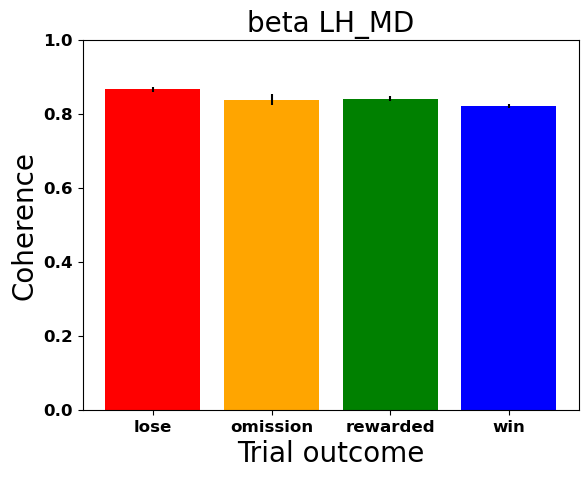

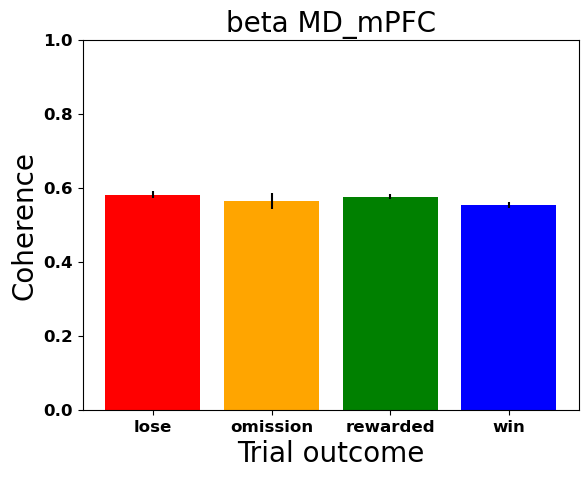

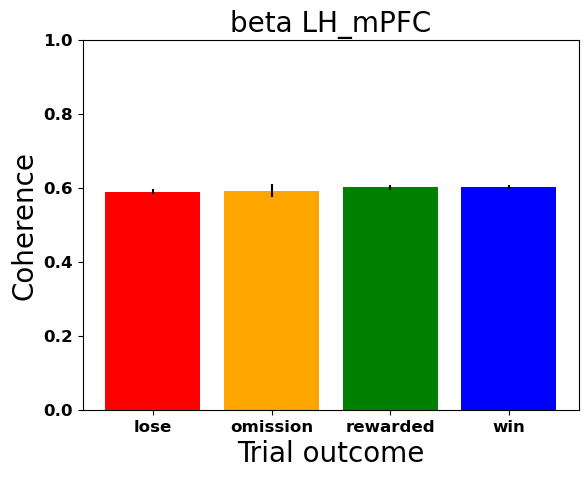

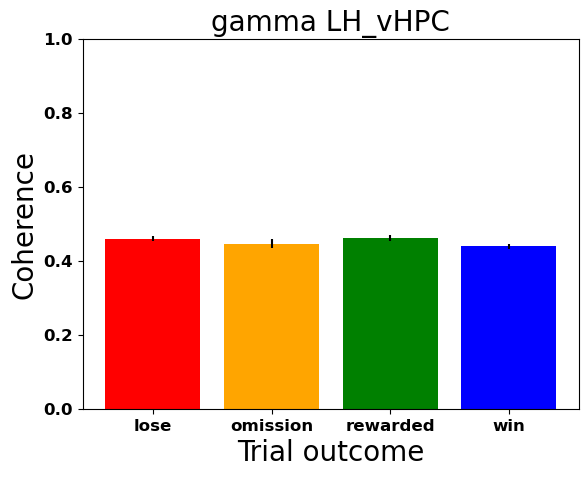

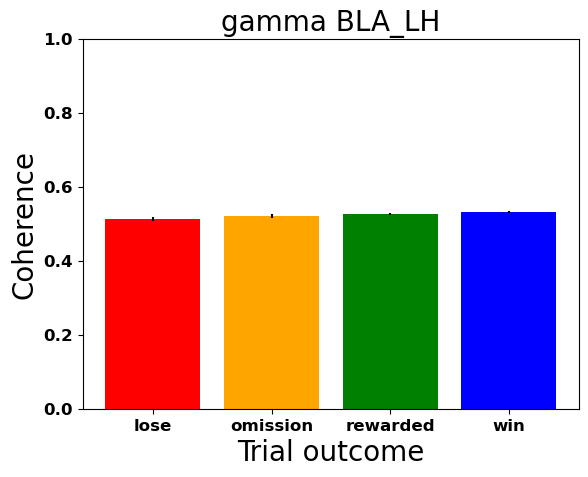

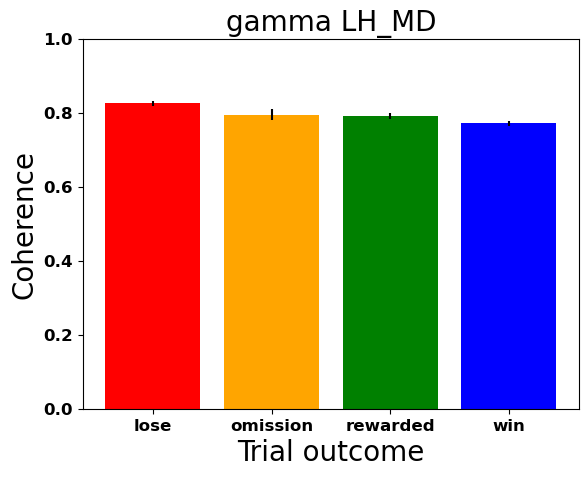

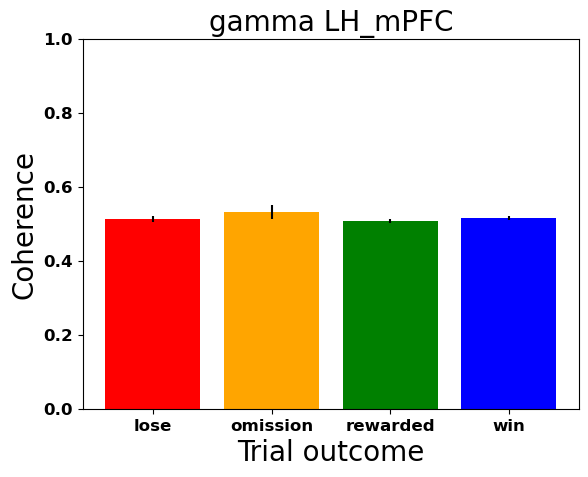

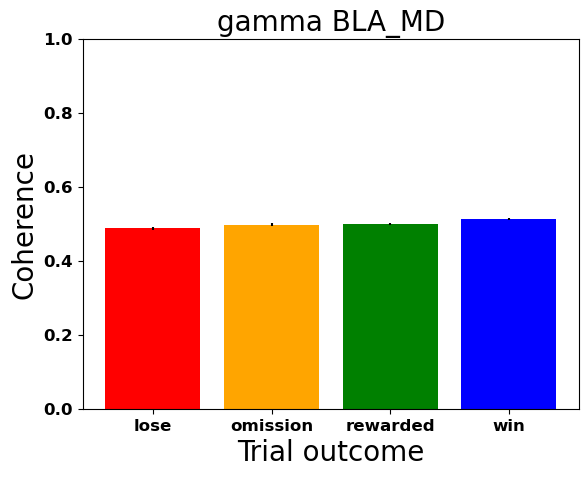

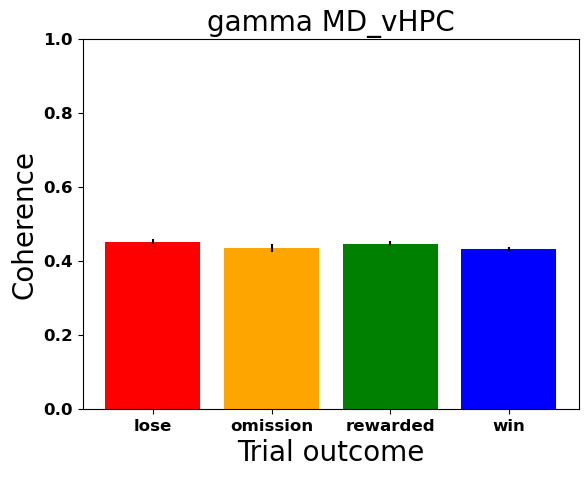

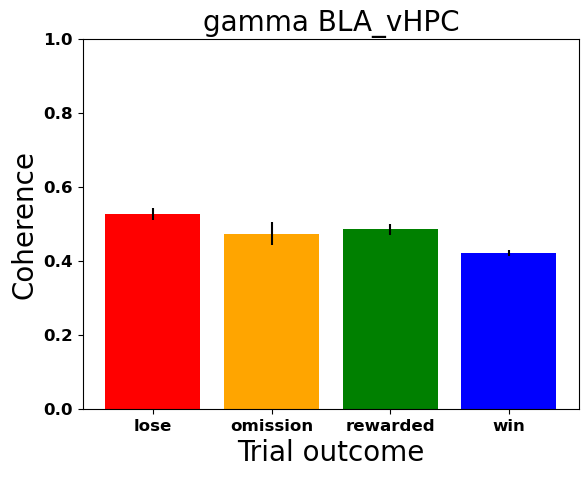

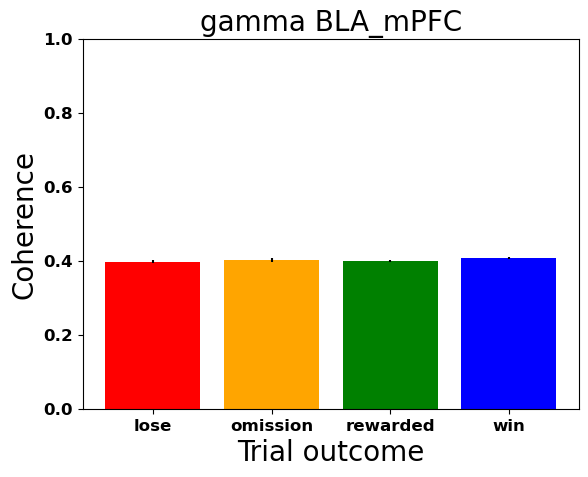

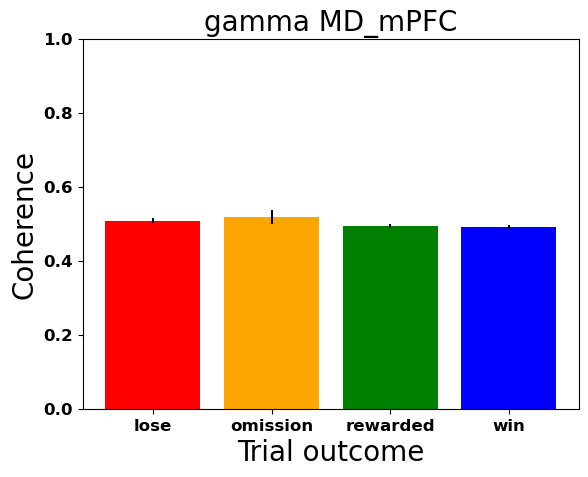

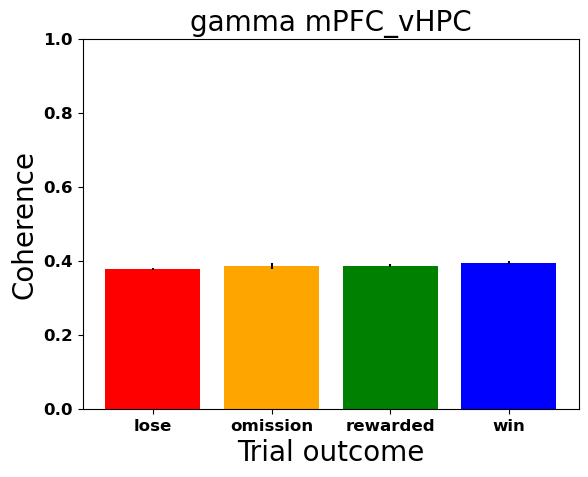

In [44]:
for band, frequency in BAND_TO_FREQ.items(): 
    for region_pair, value in region_pair_to_outcome_to_coherence[band].items():
        fig, ax = plt.subplots()
        pair_df = pd.DataFrame.from_dict(value, orient="index").reset_index()
        pair_df["color"] = pair_df["index"].map(OUTCOME_TO_COLOR)
        pair_df = pair_df.sort_values("index")
        plt.bar(pair_df["index"], pair_df["mean"], color=pair_df["color"], yerr=pair_df["sem"])
        # plt.errorbar(pair_df["index"], pair_df["mean"], yerr=pair_df["sem"])
        
        plt.title("{} {}".format(band, region_pair), fontsize=FONTSIZE)
        plt.xlabel("Trial outcome", fontsize=FONTSIZE)
        plt.ylabel("Coherence", fontsize=FONTSIZE)
        plt.ylim(0,1)
        


    
    
    
    


# Checking to see if everything is from the same distribution or not

In [45]:
trial_outcome_pairs = ("win", "lose"), ("win", "rewarded"), ("lose", "omission")

In [46]:
for band, frequency in BAND_TO_FREQ.items():
    print(band)

theta
beta
gamma


In [47]:
BASIC_LFP_TRACES_DF["trial_outcome"].unique()

array(['rewarded', 'omission', 'win', 'lose'], dtype=object)

In [48]:
region_to_mannwhitneyu = defaultdict(dict)
region_to_mannwhitneyu = []

for band, frequency in BAND_TO_FREQ.items():
    print(band)
    for pair_col in [col for col in BASIC_LFP_TRACES_DF.columns if band in col]:
        print(pair_col)  
        for outcome_pair in trial_outcome_pairs:
            outcome_1_coherence = BASIC_LFP_TRACES_DF[BASIC_LFP_TRACES_DF["trial_outcome"] == outcome_pair[0]][pair_col].dropna()
            outcome_2_coherence = BASIC_LFP_TRACES_DF[BASIC_LFP_TRACES_DF["trial_outcome"] == outcome_pair[1]][pair_col].dropna()
            statistic, p_value = mannwhitneyu(outcome_1_coherence, outcome_2_coherence, alternative='two-sided')
            region_to_mannwhitneyu.append({"band": band, "region": pair_col, "p_value": p_value, "statistic": statistic, "outcome": outcome_pair})
            





theta
BLA_LH_averaged_theta_coherence
BLA_MD_averaged_theta_coherence
BLA_mPFC_averaged_theta_coherence
BLA_vHPC_averaged_theta_coherence
LH_MD_averaged_theta_coherence
LH_mPFC_averaged_theta_coherence
LH_vHPC_averaged_theta_coherence
MD_mPFC_averaged_theta_coherence
MD_vHPC_averaged_theta_coherence
mPFC_vHPC_averaged_theta_coherence
beta
BLA_LH_averaged_beta_coherence
BLA_MD_averaged_beta_coherence
BLA_mPFC_averaged_beta_coherence
BLA_vHPC_averaged_beta_coherence
LH_MD_averaged_beta_coherence
LH_mPFC_averaged_beta_coherence
LH_vHPC_averaged_beta_coherence
MD_mPFC_averaged_beta_coherence
MD_vHPC_averaged_beta_coherence
mPFC_vHPC_averaged_beta_coherence
gamma
BLA_LH_averaged_gamma_coherence
BLA_MD_averaged_gamma_coherence
BLA_mPFC_averaged_gamma_coherence
BLA_vHPC_averaged_gamma_coherence
LH_MD_averaged_gamma_coherence
LH_mPFC_averaged_gamma_coherence
LH_vHPC_averaged_gamma_coherence
MD_mPFC_averaged_gamma_coherence
MD_vHPC_averaged_gamma_coherence
mPFC_vHPC_averaged_gamma_coherence


In [49]:
coherence_mannwhitneyu = pd.DataFrame(region_to_mannwhitneyu)

In [52]:
coherence_mannwhitneyu[coherence_mannwhitneyu["p_value"] <= 0.001/3].sort_values(["p_value", "region"], ascending=True)

,band,region,p_value,statistic,outcome
9,theta,BLA_vHPC_averaged_theta_coherence,4.138103e-12,3049.0,"(win, lose)"
24,theta,MD_vHPC_averaged_theta_coherence,7.484592e-11,3261.0,"(win, lose)"
18,theta,LH_vHPC_averaged_theta_coherence,7.685455e-11,3263.0,"(win, lose)"
72,gamma,LH_MD_averaged_gamma_coherence,3.185895e-09,3557.0,"(win, lose)"
63,gamma,BLA_MD_averaged_gamma_coherence,6.500632e-08,9251.0,"(win, lose)"
42,beta,LH_MD_averaged_beta_coherence,1.719209e-07,3906.0,"(win, lose)"
15,theta,LH_mPFC_averaged_theta_coherence,1.737798e-07,9161.0,"(win, lose)"
3,theta,BLA_MD_averaged_theta_coherence,4.131048e-06,4219.0,"(win, lose)"
0,theta,BLA_LH_averaged_theta_coherence,1.209400e-05,4334.0,"(win, lose)"
5,theta,BLA_MD_averaged_theta_coherence,2.939992e-05,2170.0,"(lose, omission)"
